## Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
sns.set()

In [6]:
stages = pd.read_csv('stages.csv')
france = pd.read_csv('france.csv')

## Analysis of french victories

<AxesSubplot:title={'center':'Number of stage wins per top country origin'}>

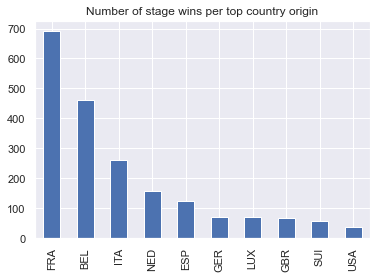

In [7]:
stages['Winner_Country'].value_counts().head(10).plot(kind='bar', title = 'Number of stage wins per top country origin')

France is still today the country with the most number of stage wins.

<AxesSubplot:title={'center':'Top french winners'}>

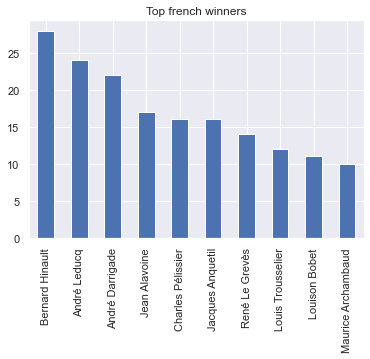

In [8]:
france['Winner'].value_counts().head(10).plot(kind='bar', title = 'Top french winners')

Here is the leaderboard of the most french wins of all time. These ridders are all retired for a long time now.

<AxesSubplot:title={'center':'Number of french wins per year'}, xlabel='Year'>

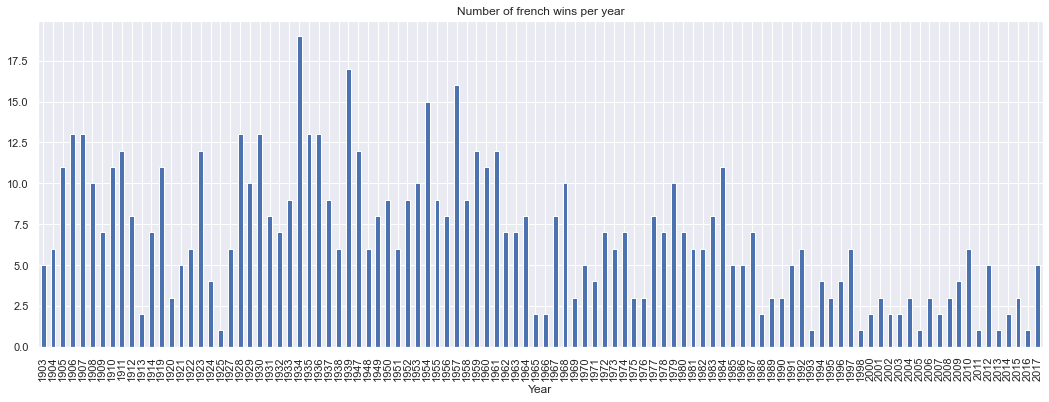

In [9]:
france.groupby('Year').count()['Stage'].plot(kind='bar', figsize=(18, 6), title = 'Number of french wins per year')

The number of french wins is slowly decreasing and hasn't been higher thn 6 since the 1987. As we can see below, the proportion of french wins overtime is quickly decreasing contrarily to Belgium and Italy (the 2nd and the 3rd country with the most stage wins).

<AxesSubplot:title={'center':'Proportion of french wins per year'}, xlabel='Year'>

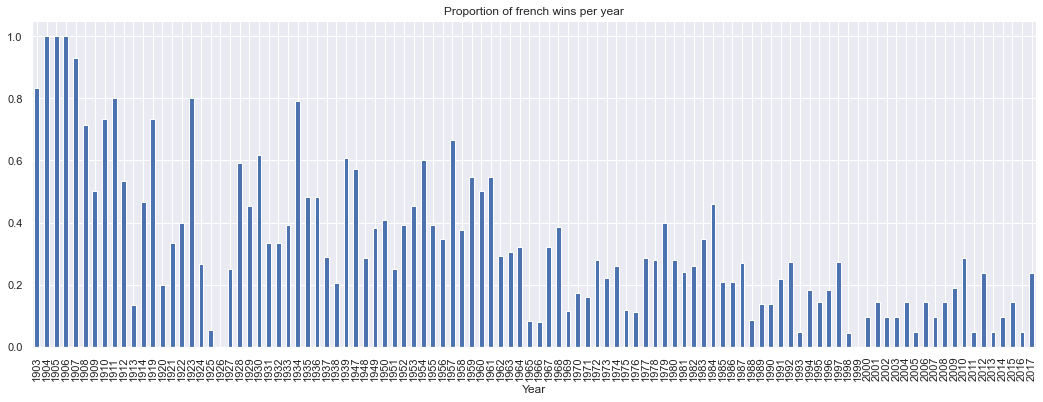

In [11]:
(france.groupby('Year').count()['Stage']/stages.groupby('Year').count()['Stage']).plot(kind = 'bar', figsize=(18, 6), title = 'Proportion of french wins per year')

Text(0.5, 1.0, 'Evolution proportion of win for each major country')

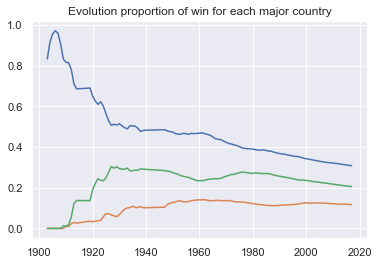

In [14]:
italie = stages.loc[(stages['Winner_Country']=='ITA')]
belgique = stages.loc[(stages['Winner_Country']=='BEL')]
year = []
prop = []
for i in range(len(np.sort((stages['Year'].unique())))):
    y = np.sort((stages['Year'].unique()))[i]
    p_fra = france[france['Year']<=y].count()['Stage']/stages[stages['Year']<=y].count()['Stage']
    p_ita = italie[italie['Year']<=y].count()['Stage']/stages[stages['Year']<=y].count()['Stage']
    p_bel = belgique[belgique['Year']<=y].count()['Stage']/stages[stages['Year']<=y].count()['Stage']
    year.append(y)
    prop.append([p_fra, p_ita, p_bel])

plt.plot(year,prop)
plt.title('Evolution proportion of win for each major country')

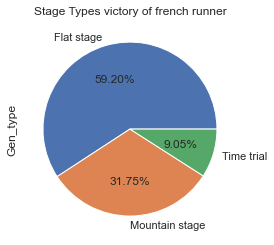

In [15]:
france['Gen_type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Stage Types victory of french runner')
plt.show()

Even if the french win a great amount of flat stages, they have an important proportion of mountain stage wins.

## Analysis of origin

<AxesSubplot:title={'center':'evolution of idtance from origin to birth location'}, xlabel='Year'>

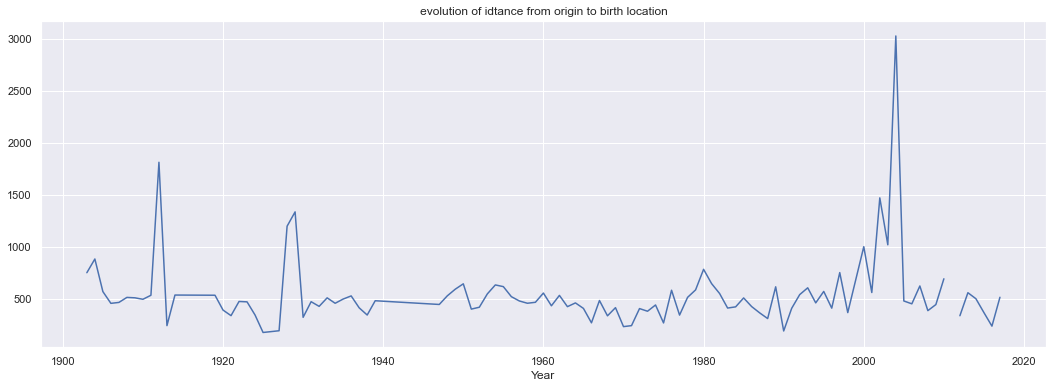

In [19]:
france.groupby('Year')['dist_from_origin'].mean().plot(figsize=(18, 6), title = 'evolution of idtance from origin to birth location')

In [20]:
france

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,Year,rider_name,Gen_type,birth_date,birth_city,dist_from_origin,dist_from_destination
0,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017,Arnaud_Démare,NaN,1991-08-26,Beauvais,304.443072,314.579870
1,8,2017-07-08,187.5,Dole,Station des Rousses,Medium mountain stage,Lilian Calmejane,FRA,2017,Lilian_Calmejane,Mountain stage,1992-12-06,Albi,438.083553,119.446364
2,12,2017-07-13,214.5,Pau,Peyragudes,High mountain stage,Romain Bardet,FRA,2017,Romain_Bardet,Mountain stage,1990-11-09,Brioude,372.831023,NaN
3,13,2017-07-14,101.0,Saint-Girons,Foix,High mountain stage,Warren Barguil,FRA,2017,Warren_Barguil,Mountain stage,1991-10-28,Hennebont,637.730081,659.747529
4,18,2017-07-20,179.5,Briançon,Col d'Izoard,High mountain stage,Warren Barguil,FRA,2017,Warren_Barguil,Mountain stage,1991-10-28,Hennebont,828.249291,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,1,1903-07-01,467.0,Paris,Lyon,Plain stage,Maurice Garin,FRA,1903,Maurice_Garin,Flat stage,1871-03-03,Arvier,507.338101,181.809746
687,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,1903,Hippolyte_Aucouturier,Mountain stage,1876-10-17,La Celle,853.558163,1094.608352
688,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,1903,Hippolyte_Aucouturier,Flat stage,1876-10-17,La Celle,1094.608352,1189.503496
689,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,1903,Maurice_Garin,Flat stage,1871-03-03,Arvier,615.127609,690.364668


<AxesSubplot:title={'center':'evolution of idtance from origin to birth location'}, xlabel='Year'>

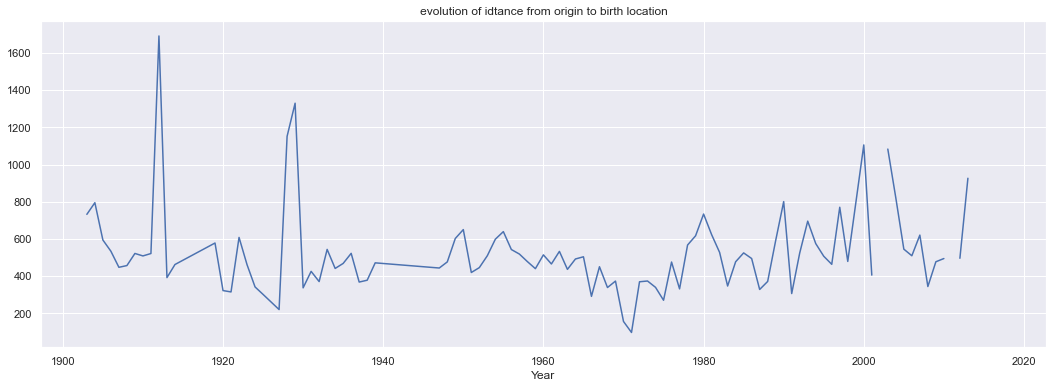

In [21]:
france.groupby('Year')['dist_from_destination'].mean().plot(figsize=(18, 6), title = 'evolution of idtance from origin to birth location')

<AxesSubplot:title={'center':'evolution of idtance from origin to birth location'}, xlabel='Age'>

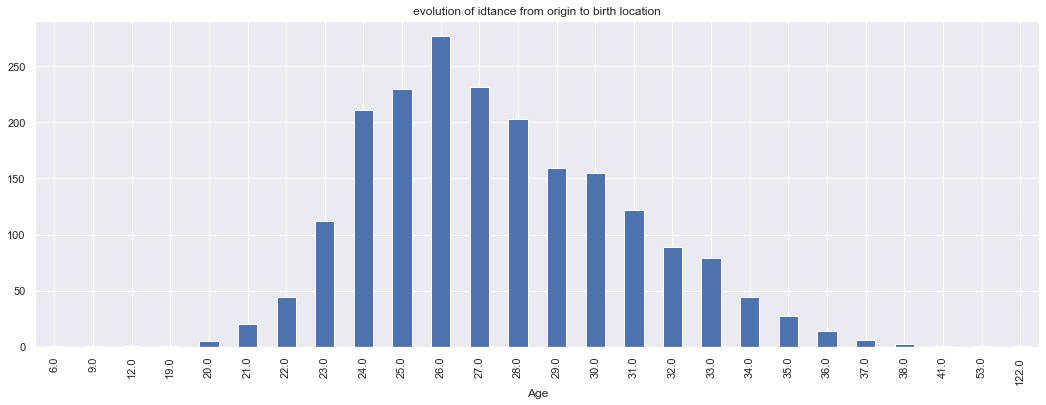

In [29]:
stages['birth_date'] = pd.to_datetime(stages['birth_date'])
stages['Year_birth'] = stages['birth_date'].map(lambda x: x.year) # add year column
stages['Age'] = stages['Year'] - stages['Year_birth']
stages.groupby('Age').count()['Stage'].plot(kind = 'bar', figsize=(18, 6), title = 'evolution of idtance from origin to birth location')